# GridSearchCV Model Selection

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years  
      - sex  
      - bmi     body mass index  
      - bp      average blood pressure  
      - s1      tc, total serum cholesterol  
      - s2      ldl, low-density lipoproteins  
      - s3      hdl, high-density lipoproteins  
      - s4      tch, total cholesterol / HDL  
      - s5      ltg, possibly log of serum triglycerides level  
      - s6      glu, blood sugar level  

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.
(https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)


In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
X, y = load_diabetes(return_X_y=True, as_frame=True)
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.1, random_state=1000)

In [3]:
X.skew()

age   -0.231382
sex    0.127385
bmi    0.598148
bp     0.290658
s1     0.378108
s2     0.436592
s3     0.799255
s4     0.735374
s5     0.291754
s6     0.207917
dtype: float64

In [4]:
X.mean()

age   -2.511817e-19
sex    1.230790e-17
bmi   -2.245564e-16
bp    -4.797570e-17
s1    -1.381499e-17
s2     3.918434e-17
s3    -5.777179e-18
s4    -9.042540e-18
s5     9.293722e-17
s6     1.130318e-17
dtype: float64

In [5]:
model = SVR(C=1)
model.fit(X_train, y_train)

SVR(C=1)

<AxesSubplot: xlabel='target', ylabel='target'>

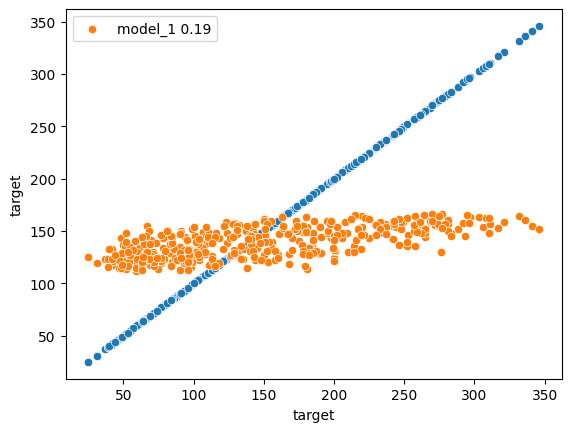

In [8]:
sns.scatterplot(y = y_train, x = y_train)
sns.scatterplot(y = model.predict(X_train), x = y_train, label = f'model_1 {model.score(X_train, y_train).round(2)}')

In [10]:
# kernel='rbf',
#     degree=3,
#     gamma='scale',
#     coef0=0.0,
#     tol=0.001,
#     C=1.0,
SVR()

p_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : np.arange(1, 6),
    'C': np.logspace(-3,3,7)
}

grid = GridSearchCV(model, param_grid=p_grid, cv = 5)
grid

GridSearchCV(cv=5, estimator=SVR(C=1),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'degree': array([1, 2, 3, 4, 5]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [11]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(C=1),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'degree': array([1, 2, 3, 4, 5]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [18]:
pd.DataFrame(grid.cv_results_).iloc[:,4:].sort_values('rank_test_score')

,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
95,10.0,4,sigmoid,"{'C': 10.0, 'degree': 4, 'kernel': 'sigmoid'}",0.447181,0.541285,0.469842,0.445526,0.479385,0.476644,0.034839,1
91,10.0,3,sigmoid,"{'C': 10.0, 'degree': 3, 'kernel': 'sigmoid'}",0.447181,0.541285,0.469842,0.445526,0.479385,0.476644,0.034839,1
87,10.0,2,sigmoid,"{'C': 10.0, 'degree': 2, 'kernel': 'sigmoid'}",0.447181,0.541285,0.469842,0.445526,0.479385,0.476644,0.034839,1
83,10.0,1,sigmoid,"{'C': 10.0, 'degree': 1, 'kernel': 'sigmoid'}",0.447181,0.541285,0.469842,0.445526,0.479385,0.476644,0.034839,1
99,10.0,5,sigmoid,"{'C': 10.0, 'degree': 5, 'kernel': 'sigmoid'}",0.447181,0.541285,0.469842,0.445526,0.479385,0.476644,0.034839,1
...,...,...,...,...,...,...,...,...,...,...,...,...
127,1000.0,2,sigmoid,"{'C': 1000.0, 'degree': 2, 'kernel': 'sigmoid'}",-3813.799130,-2906.176284,-4337.843633,-1508.767609,-5303.536770,-3574.024685,1291.776413,136
131,1000.0,3,sigmoid,"{'C': 1000.0, 'degree': 3, 'kernel': 'sigmoid'}",-3813.799130,-2906.176284,-4337.843633,-1508.767609,-5303.536770,-3574.024685,1291.776413,136
123,1000.0,1,sigmoid,"{'C': 1000.0, 'degree': 1, 'kernel': 'sigmoid'}",-3813.799130,-2906.176284,-4337.843633,-1508.767609,-5303.536770,-3574.024685,1291.776413,136
135,1000.0,4,sigmoid,"{'C': 1000.0, 'degree': 4, 'kernel': 'sigmoid'}",-3813.799130,-2906.176284,-4337.843633,-1508.767609,-5303.536770,-3574.024685,1291.776413,136


In [16]:
grid.best_estimator_

SVR(C=10.0, degree=1, kernel='sigmoid')

In [17]:
grid.best_score_

0.4766437477224746

<AxesSubplot: xlabel='target', ylabel='target'>

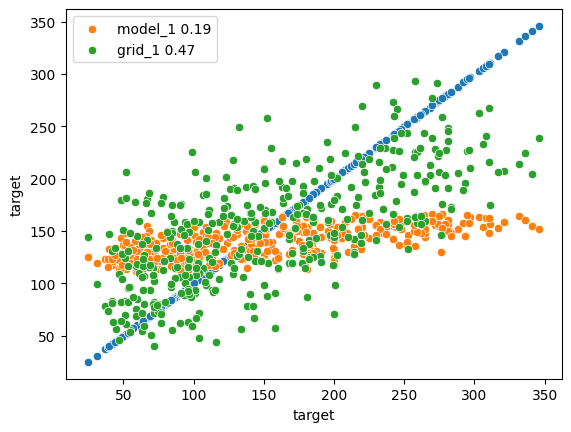

In [20]:
sns.scatterplot(y = y_train, x = y_train)
sns.scatterplot(y = model.predict(X_train), x = y_train, label = f'model_1 {model.score(X_train, y_train).round(2)}')
sns.scatterplot(y = grid.predict(X_train), x = y_train, label = f'grid_1 {grid.score(X_train, y_train).round(2)}')